In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
! pip install mglearn

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.2
matplotlib version: 3.1.1
NumPy version: 1.17.2
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3


In [2]:
#applying MLP classifier to the two_moons dataset
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_moons

In [3]:
#splitting

from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                        random_state=42)


In [4]:
import mglearn
from matplotlib import pyplot as plt
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/macuser/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/macuser/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Feature 1')

Text(0, 0.5, 'Feature 1')

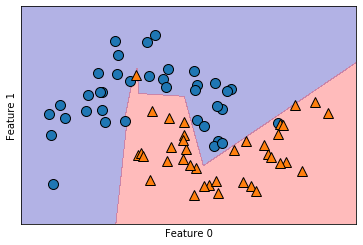

In [5]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

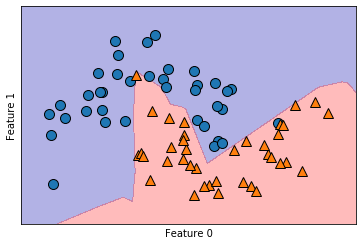

In [6]:
    # using two hidden layers, with 10 units each
    mlp = MLPClassifier(solver='lbfgs', random_state=0,
                        hidden_layer_sizes=[10, 10])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

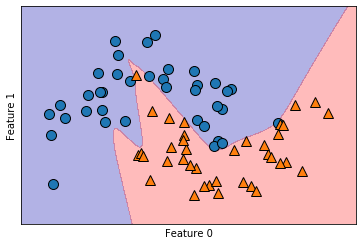

In [7]:
 # using two hidden layers, with 10 units each, now with tanh nonlinearity

mlp = MLPClassifier(solver='lbfgs', activation='tanh',
            random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Discuss the effect of the hidden layer sizes on the decision boundary you visualized

### As we increase the number of hidden layers, we get a smoother decision boundary. 

Text(0.5, 1.0, 'n_hidden=[100, 100]\nalpha=1.0000')

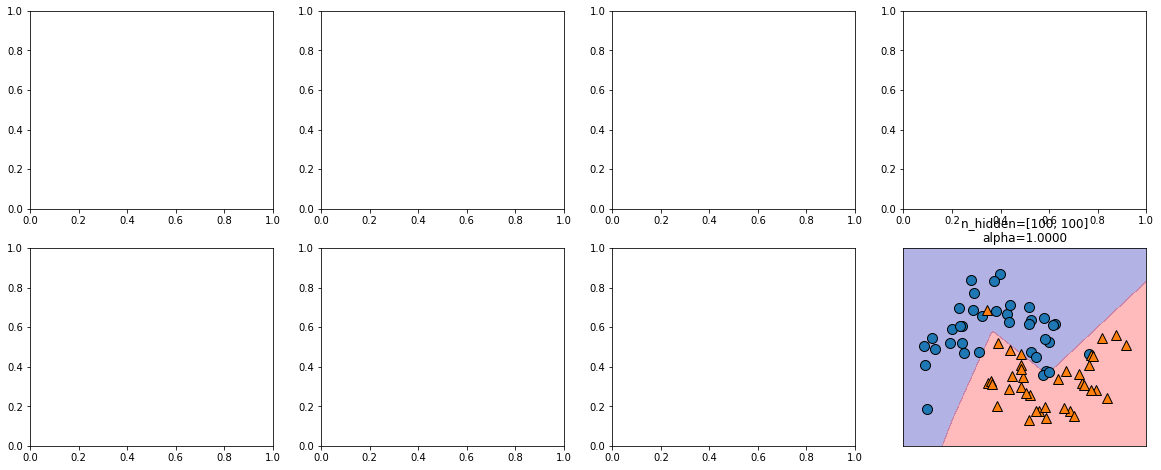

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for axx, n_hidden_nodes in zip(axes, [10, 100]):

    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
                     mlp = MLPClassifier(solver='lbfgs', random_state=0,
                                hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                                alpha=alpha)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax) 
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax) 
ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                          n_hidden_nodes, n_hidden_nodes, alpha))

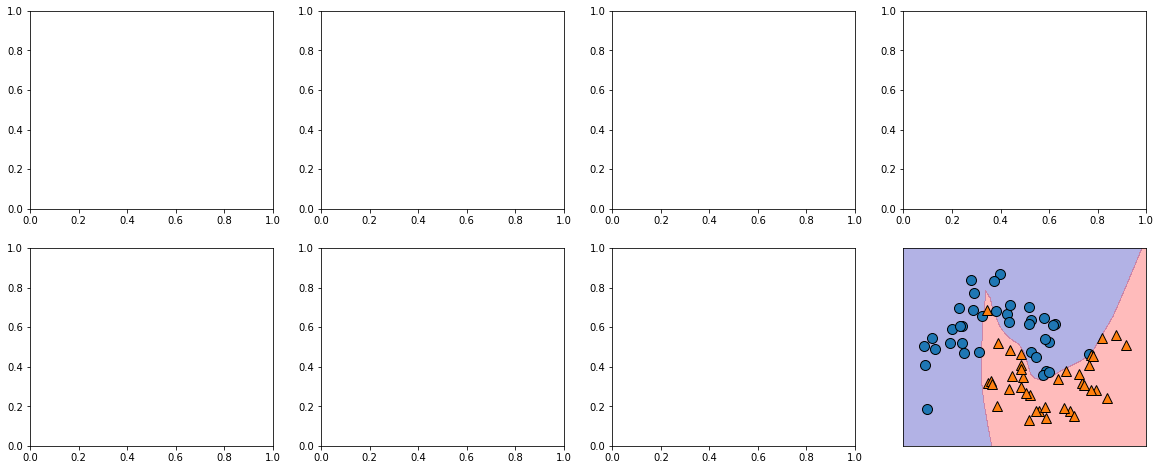

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8)) 
for i, ax in enumerate(axes.ravel()):
        mlp = MLPClassifier(solver='lbfgs', random_state=i,
                            hidden_layer_sizes=[100, 100])
        
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

# effect of alpha 
## Alpha  helps to control model complexity, reduces overfitting resulting in a smoother decision boundary.

In [10]:
#loading breast cancer dataset
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

In [11]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [12]:
 X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, random_state=0)
   

 mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [13]:
#compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

In [14]:
####2. Rescale the data by hand and rebuild the model with parameters tuned
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp01=MLPClassifier(max_iter=1000,solver='lbfgs',activation='tanh',
    random_state=1,hidden_layer_sizes=[10,10])
mlp01.fit(X_train_scaled,y_train)
print('\n'"accuracy on training set: %f" % mlp01.score(X_train_scaled, y_train))
print('\n'"accuracy on test set: %f" % mlp01.score(X_test_scaled, y_test))



accuracy on training set: 1.000000

accuracy on test set: 0.958042


In [15]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

    
print("Accuracy on training set: {:.3f}".format( 
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


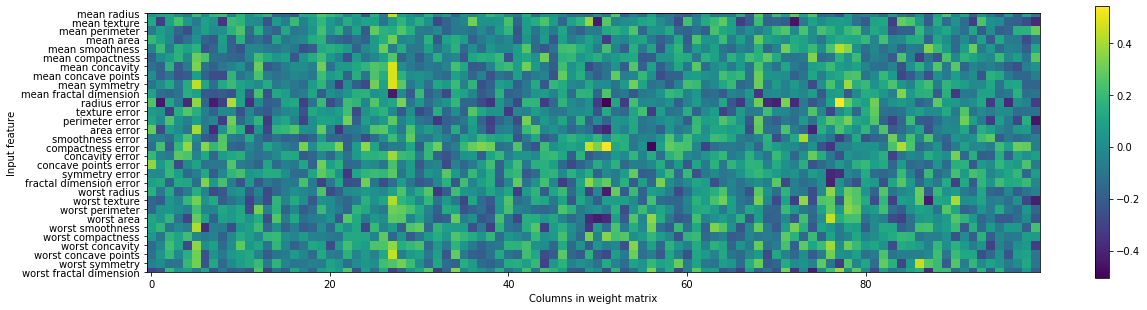

In [16]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
